In [ ]:
!pip install wget tensorflow pandas numpy keras
!pip install nltk

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=554c6a6d11d8c216c5e0e531f1a51ece2ab7fddced10547d6f8433161ace4c77
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
url ='https://www.dropbox.com/s/a247ju2qsczh0be/glove.6B.100d.txt?dl=1'
wget.download(url)

'glove.6B.100d (1).txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# https://drive.google.com/file/d/19d_QDYFVtRPXQ7YVAsnDGA308csfTRnW/view?usp=sharing

import pandas as pd
import gdown
import zipfile

download_url = 'https://drive.google.com/uc?export=download&id=19d_QDYFVtRPXQ7YVAsnDGA308csfTRnW'  # Replace with your link
filename = 'dataset.zip'  # Adjust filename if needed

gdown.download(download_url, filename, quiet=False)

# Extract the downloaded ZIP
with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?export=download&id=19d_QDYFVtRPXQ7YVAsnDGA308csfTRnW
To: /content/dataset.zip
100%|██████████| 104k/104k [00:00<00:00, 26.7MB/s]


In [ ]:
import glob
import pandas as pd

csv_files = glob.glob("/content/Dataset-for-intent-classification-2/*.csv")

dataframes = {}

for file in csv_files:
    df = pd.read_csv(file)
    dataframes[file] = df

for file, df in dataframes.items():
    print(file, df.shape)


/content/Dataset-for-intent-classification-2/df_welcome.csv (783, 2)
/content/Dataset-for-intent-classification-2/df_search.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_payment_issue.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_farewell.csv (494, 2)
/content/Dataset-for-intent-classification-2/df_get_refund.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_track_order.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_recover_password.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_contact_human.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_cancel_order.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_search_product_information.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_unknown.csv (675, 2)


In [ ]:
import pandas as pd
merged_df = pd.concat(dataframes.values(), ignore_index=True)

In [ ]:
merged_df

,text,intent
0,It is Adam,welcome
1,I am Bella,welcome
2,Hola how are you?,welcome
3,Hello how are you?,welcome
4,Hola how are you?,welcome
...,...,...
9947,"Have you heard about the new jelly, shampoo, t...",unknown
9948,"I'm not a fan of the taste of soda, bagels, ba...",unknown
9949,joke please,unknown
9950,Hello! Just wanted to check if you're there.,unknown


Unique intents: ['welcome' 'search' 'payment_issue' 'farewell' 'get_refund' 'track_order'
 'recover_password' 'contact_human' 'cancel_order'
 'search_product_information' 'unknown']
Intent counts:
 search                        1000
payment_issue                 1000
get_refund                    1000
track_order                   1000
recover_password              1000
contact_human                 1000
cancel_order                  1000
search_product_information    1000
welcome                        783
unknown                        675
farewell                       494
Name: intent, dtype: int64


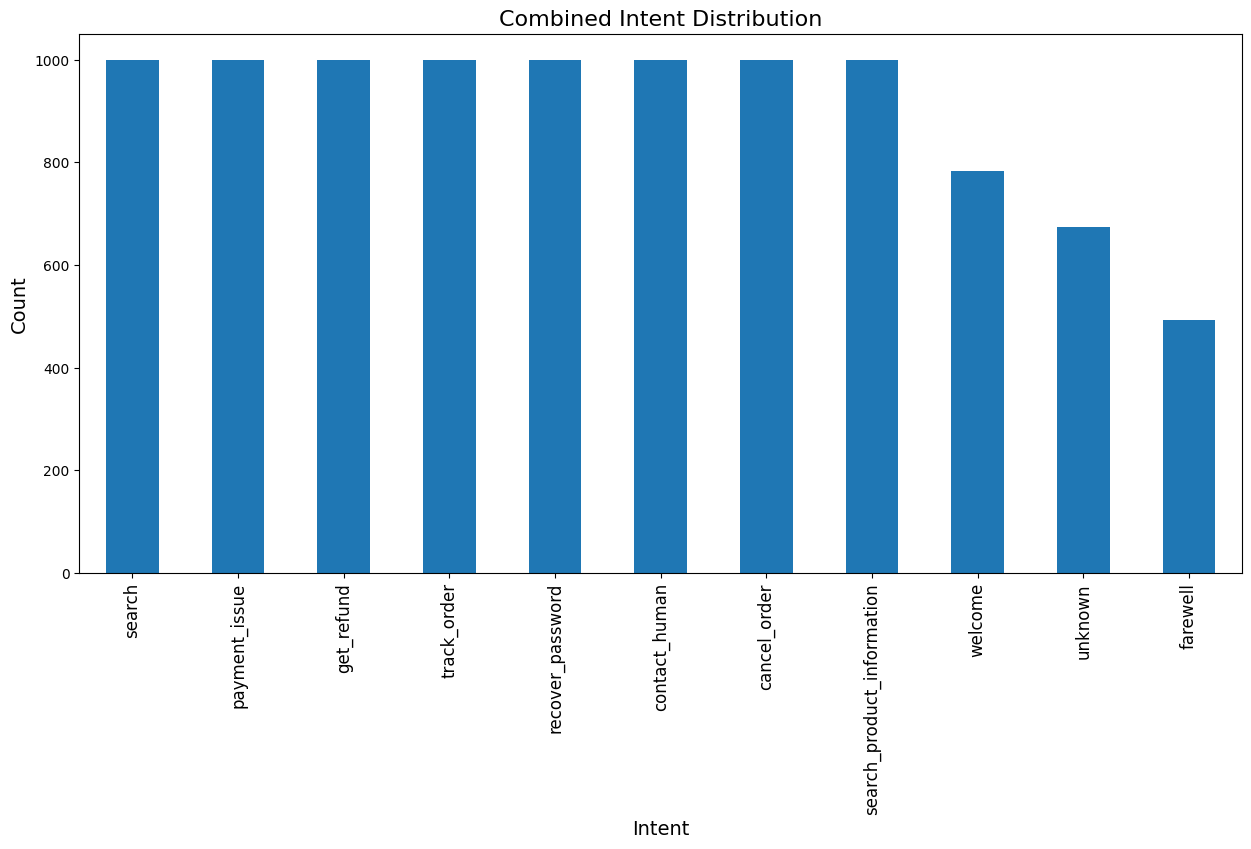

In [ ]:
import matplotlib.pyplot as plt

unique_intents = merged_df['intent'].unique()
intent_counts = merged_df['intent'].value_counts()

print("Unique intents:", unique_intents)
print("Intent counts:\n", intent_counts)

# Get the data
intents = merged_df['intent'].unique()
counts = merged_df['intent'].value_counts()

# Create the plot
plt.figure(figsize=(15, 7))
counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Combined Intent Distribution", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [ ]:
import string
import re
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()

def clean_text_preserve_order_numbers(text):


    order_numbers = re.findall(r"\d{6,}", text)  # Assuming order numbers have at least 6 digits

    # Clean the text (lowercase, remove punctuation, normalize spaces)
    cleaned_text = re.sub(r"[^\w\s@]", "", text.lower())
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)

    # Re-insert preserved order numbers
    for num in order_numbers:
        cleaned_text = cleaned_text.replace(f" {num} ", f" ONUM{num} ")
    return cleaned_text


merged_df['clean_text'] = merged_df['text'].apply(clean_text_preserve_order_numbers)

In [ ]:
merged_df.head()

,text,intent,clean_text
0,It is Adam,welcome,it is adam
1,I am Bella,welcome,i am bella
2,Hola how are you?,welcome,hola how are you
3,Hello how are you?,welcome,hello how are you
4,Hola how are you?,welcome,hola how are you


In [ ]:
text = merged_df['clean_text']
labels = merged_df['intent']

print("text",text.shape)
print("labels",labels.shape)

text (9952,)
labels (9952,)


In [ ]:
from operator import index
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)  # Adjust n_splits if needed

for train_index, test_index in sss.split(text, labels):
    train_txt, test_txt = text.iloc[train_index], text.iloc[test_index]
    train_label, test_labels = labels.iloc[train_index], labels.iloc[test_index]


print("X_train",train_txt.shape)
print("X_test",test_txt.shape)
print("y_train",train_label.shape)
print("y_test",test_labels.shape)

X_train (6966,)
X_test (2986,)
y_train (6966,)
y_test (2986,)


In [ ]:
test_txt= pd.DataFrame(test_txt)
test_labels= pd.DataFrame(test_labels)

In [ ]:
test_txt=test_txt["clean_text"]

In [ ]:
test_labels = test_labels["intent"]

In [ ]:

sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for valid_index, test_index in sss_test.split(test_txt, test_labels):
  val_txt, test_txt = test_txt.iloc[valid_index], test_txt.iloc[test_index]
  val_label, test_labels = test_labels.iloc[valid_index], test_labels.iloc[test_index]


In [ ]:
print("train text",train_txt.shape)
print("test text",test_txt.shape)
print("validation text",val_txt.shape)
print("train label",train_label.shape)
print("test label",test_labels.shape)
print("validation label",val_label.shape)

train text (6966,)
test text (1493,)
validation text (1493,)
train label (6966,)
test label (1493,)
validation label (1493,)


In [ ]:
print("Train intent count:\n", train_label.value_counts())
print("Test intent count:\n", test_labels.value_counts())
print("validation intent count:\n", val_label.value_counts())

Train intent count:
 search_product_information    700
search                        700
cancel_order                  700
get_refund                    700
payment_issue                 700
contact_human                 700
track_order                   700
recover_password              700
welcome                       548
unknown                       472
farewell                      346
Name: intent, dtype: int64
Test intent count:
 cancel_order                  150
search_product_information    150
search                        150
payment_issue                 150
contact_human                 150
recover_password              150
get_refund                    150
track_order                   150
welcome                       117
unknown                       102
farewell                       74
Name: intent, dtype: int64
validation intent count:
 contact_human                 150
search_product_information    150
recover_password              150
track_order                  

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_num_words = 40000
classes = np.unique(labels)

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(train_txt)
word_index = tokenizer.word_index

ls = [len(c.split()) for c in train_txt]
maxLen = int(np.percentile(ls, 98))

train_sequences = tokenizer.texts_to_sequences(train_txt)
train_sequences = pad_sequences(train_sequences, maxlen=maxLen, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_txt)
test_sequences = pad_sequences(test_sequences, maxlen=maxLen, padding='post')

val_sequences = tokenizer.texts_to_sequences(val_txt)
val_sequences = pad_sequences(val_sequences, maxlen=maxLen, padding='post')

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

classes = np.unique(labels)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder.fit(integer_encoded)

train_label_encoded = label_encoder.transform(train_label)
train_label_encoded = train_label_encoded.reshape(len(train_label_encoded), 1)
train_label = onehot_encoder.transform(train_label_encoded)

test_labels_encoded = label_encoder.transform(test_labels)
test_labels_encoded = test_labels_encoded.reshape(len(test_labels_encoded), 1)
test_labels = onehot_encoder.transform(test_labels_encoded)

val_labels_encoded = label_encoder.transform(val_label)
val_labels_encoded = val_labels_encoded.reshape(len(val_labels_encoded), 1)
val_labels = onehot_encoder.transform(val_labels_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        word, *coefs = line.split()
        embeddings_index[word] = np.asarray(coefs, dtype='float32')


In [ ]:
import numpy as np
max_num_words = 40000
# Calculate embedding statistics
all_embs = np.stack(list(embeddings_index.values()))
emb_mean = all_embs.mean()
emb_std = all_embs.std()

# Determine embedding matrix size
num_words = min(max_num_words, len(word_index)) + 1

# Get embedding dimension
embedding_dim = len(embeddings_index['the'])

# Initialize embedding matrix with random values based on statistics
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))

# Fill matrix with pre-trained embeddings
for word, i in word_index.items():
  if i >= max_num_words:
    break
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding

model = Sequential()
model.add(Embedding(num_words, 100, trainable=False, input_length=train_sequences.shape[1], weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(256, recurrent_dropout=0.1, dropout=0.1)))
model.add(Dropout(0.3))
# model.add(LSTM(256, return_sequences=False, recurrent_dropout=0.1, dropout=0.1))
# model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(classes.shape[0], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 22, 100)           347200    
                                                                 
 bidirectional_12 (Bidirect  (None, 512)               731136    
 ional)                                                          
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                25650     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 11)                561       
                                                     

In [ ]:
history = model.fit(train_sequences, train_label, epochs = 10,
          batch_size = 64, shuffle=True,
          validation_data=[val_sequences, val_labels])

Epoch 1/10
109/109 [==============================] - 69s 559ms/step - loss: 1.2599 - acc: 0.5650 - val_loss: 0.4038 - val_acc: 0.8526
Epoch 2/10
109/109 [==============================] - 62s 567ms/step - loss: 0.3189 - acc: 0.9097 - val_loss: 0.1569 - val_acc: 0.9571
Epoch 3/10
109/109 [==============================] - 61s 554ms/step - loss: 0.2038 - acc: 0.9414 - val_loss: 0.1154 - val_acc: 0.9672
Epoch 4/10
109/109 [==============================] - 61s 557ms/step - loss: 0.1583 - acc: 0.9529 - val_loss: 0.1262 - val_acc: 0.9638
Epoch 5/10
109/109 [==============================] - 63s 575ms/step - loss: 0.1266 - acc: 0.9624 - val_loss: 0.1091 - val_acc: 0.9685
Epoch 6/10
109/109 [==============================] - 61s 563ms/step - loss: 0.0964 - acc: 0.9704 - val_loss: 0.0697 - val_acc: 0.9779
Epoch 7/10
109/109 [==============================] - 60s 554ms/step - loss: 0.0871 - acc: 0.9717 - val_loss: 0.0858 - val_acc: 0.9705
Epoch 8/10
109/109 [==============================] - 6

In [ ]:
model.evaluate(test_sequences, test_labels)

47/47 [==============================] - 5s 114ms/step - loss: 0.0731 - acc: 0.9799


[0.07306189090013504, 0.9799062013626099]

In [ ]:
model.save('models/intents.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 9s 147ms/step


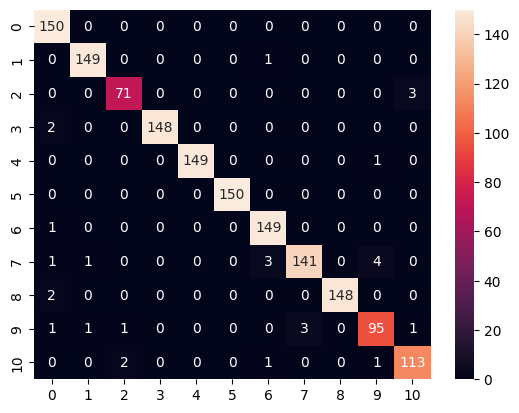

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(test_sequences)
y_pred = np.argmax(y_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [ ]:
# prompt: how can i test my model with some example sentences

import numpy as np
example_sentences = ["Can you help me find a restaurant?"]

# Preprocess the example sentences
example_sequences = tokenizer.texts_to_sequences(example_sentences)
example_sequences = pad_sequences(example_sequences, maxlen=maxLen, padding='post')

# Make predictions
predictions = model.predict(example_sequences)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Map the predicted classes to their corresponding intent labels
predicted_intents = label_encoder.inverse_transform(predicted_classes)

# Print the predicted intents
for sentence, intent in zip(example_sentences, predicted_intents):
  print(f"Sentence: {sentence}, Predicted Intent: {intent}")
